<a href="https://colab.research.google.com/github/natigbek/Tumor-Recgonizer-v7/blob/main/Tumor_Recgonizer_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pds
dataset1 = pds.read_csv('train.csv')
print(len(dataset1.columns))

10


In [130]:
xs = dataset1.iloc[:, 0:8].values
ys = dataset1.iloc[:, 9].values

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2)

In [132]:
from sklearn.preprocessing import MinMaxScaler
# Scale the features and target
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))


In [133]:
import tensorflow as tf
model = tf.keras.Sequential()

In [134]:
model.add(tf.keras.layers.Dense(units=256, input_shape=(8,), activation='relu'))  # First hidden layer
model.add(tf.keras.layers.Dense(units=256, activation='relu'))  # Second hidden layer
model.add(tf.keras.layers.Dense(units=1, activation='linear'))  # Output layer for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
from tensorflow.keras.callbacks import EarlyStopping
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mae']) # MSE for loss, MAE for metrics

# Add early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [136]:
print("Shape of x_train:", x_train.shape)

Shape of x_train: (7316, 8)


In [137]:
# Train the model
history = model.fit(
    x_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0793 - mae: 0.2310
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0594 - mae: 0.2010
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0565 - mae: 0.1930
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0546 - mae: 0.1899
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0537 - mae: 0.1855
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0557 - mae: 0.1914
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0530 - mae: 0.1838
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0526 - mae: 0.1832
Epoch 9/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0523 - mae: 0.1825
Epoch 10/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0506 - mae: 0.1773
Epoch 11/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0525 - mae: 0.1823
Epoch 12/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0513 - mae: 0.1788
Epoch 13/100


In [138]:
# Evaluate the model
loss, mae = model.evaluate(x_test_scaled, y_test_scaled)
print(f"Final Test Loss: {loss}, Test MAE: {mae}")
# Predict and inverse-transform
y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0447 - mae: 0.1610
Final Test Loss: 0.044951967895030975, Test MAE: 0.16138222813606262
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


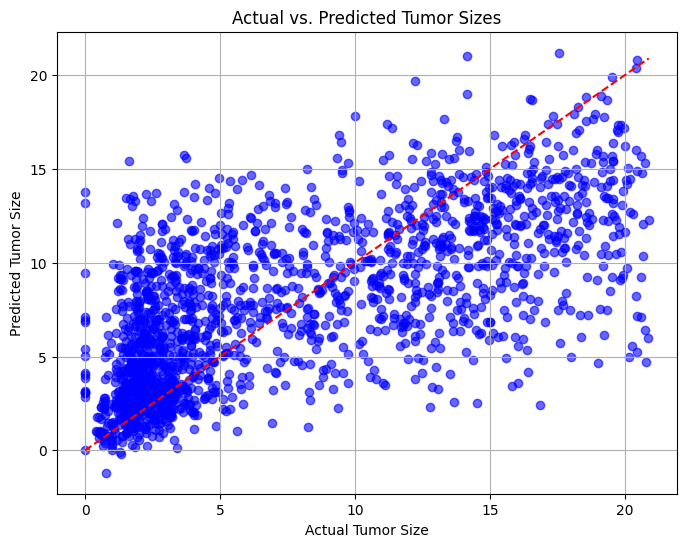

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform predictions and actual values
y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test_scaled)

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Tumor Sizes')
plt.xlabel('Actual Tumor Size')
plt.ylabel('Predicted Tumor Size')
plt.grid()
plt.show()

In [140]:
# Step 1: Load test.csv
test_data = pds.read_csv('test.csv')

# Step 2: Select the first 9 columns (features)
test_features = test_data.iloc[:, :8].values

# Step 3: Scale the features using the same scaler used for training
test_features_scaled = scaler.transform(test_features)

# Step 4: Predict tumor sizes
test_predictions_scaled = model.predict(test_features_scaled)
test_predictions = y_scaler.inverse_transform(test_predictions_scaled)

# Step 5: Save predictions to a CSV file
output_df = pds.DataFrame({'Predicted Tumor Sizes': test_predictions.flatten()})
output_df.to_csv('tumor_predictions.csv', index=False)

# Step 6: Download the CSV file in Google Colab if want to download it
#from google.colab import files
#files.download('tumor_predictions.csv')


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>